# Graph Generation

This notebook generates a series of gephi graph files displaying different aspects of a literary text marked up using the Chronotopic Cartographies XML schema.

**To generate the graphs:**
- Put your **valid** XML file in the 'files/xml/' folder, in the folder containing this notebook. 
- Edit cell 3 so that the 'input_file' variable is the name of the file you want to process. 
- Run the cells in order - the output from cell 5 will give you warnings if your xml file isn't valid, and will tell you what lines the problems are on. Edit the XML file and re-run cells 4 and 5 until you don't get any further errors.
- Run cell 6. Your graphs will be saved in 'files/graphs/' and can be opened in Gephi for layout.

In [1]:
import graph_generators

In [2]:
# Edit the 'input_file' variable below to the name of your marked up XML file. 
# Make sure it's in the folder named in the 'xml_dir' variable - if you've downloaded this notebook from GitHub and are running it on your own machine, you shouldn't need to change this.

xml_dir = 'files/xml/'
output_dir = 'files/graphs/'
input_file = 'war-of-the-worlds.xml'

In [3]:
tester = graph_generators.CCXMLValidator(file=xml_dir + input_file)

In [4]:
#tester.check_xml()

In [5]:
#graph_generators.generate_all(xml_dir=xml_dir, output_dir=output_dir, input_file=input_file)

In [26]:
generator = graph_generators.TopoiGraphGenerator(xml_dir=xml_dir, output_dir=output_dir, file=input_file)

In [27]:
generator.generate()

In [28]:
generator.layout()

In [29]:
#generator.write_graphml()

In [30]:
from styles import colour_style

In [31]:
import svg_generators

In [32]:
generator.graph

In [33]:
svggen = svg_generators.GraphToSvg(graph=generator.graph)

In [34]:
svggen.draw_graph(output_file='files/svg/test.svg', style=colour_style, curved=True)

In [35]:
from IPython.display import display_svg, SVG

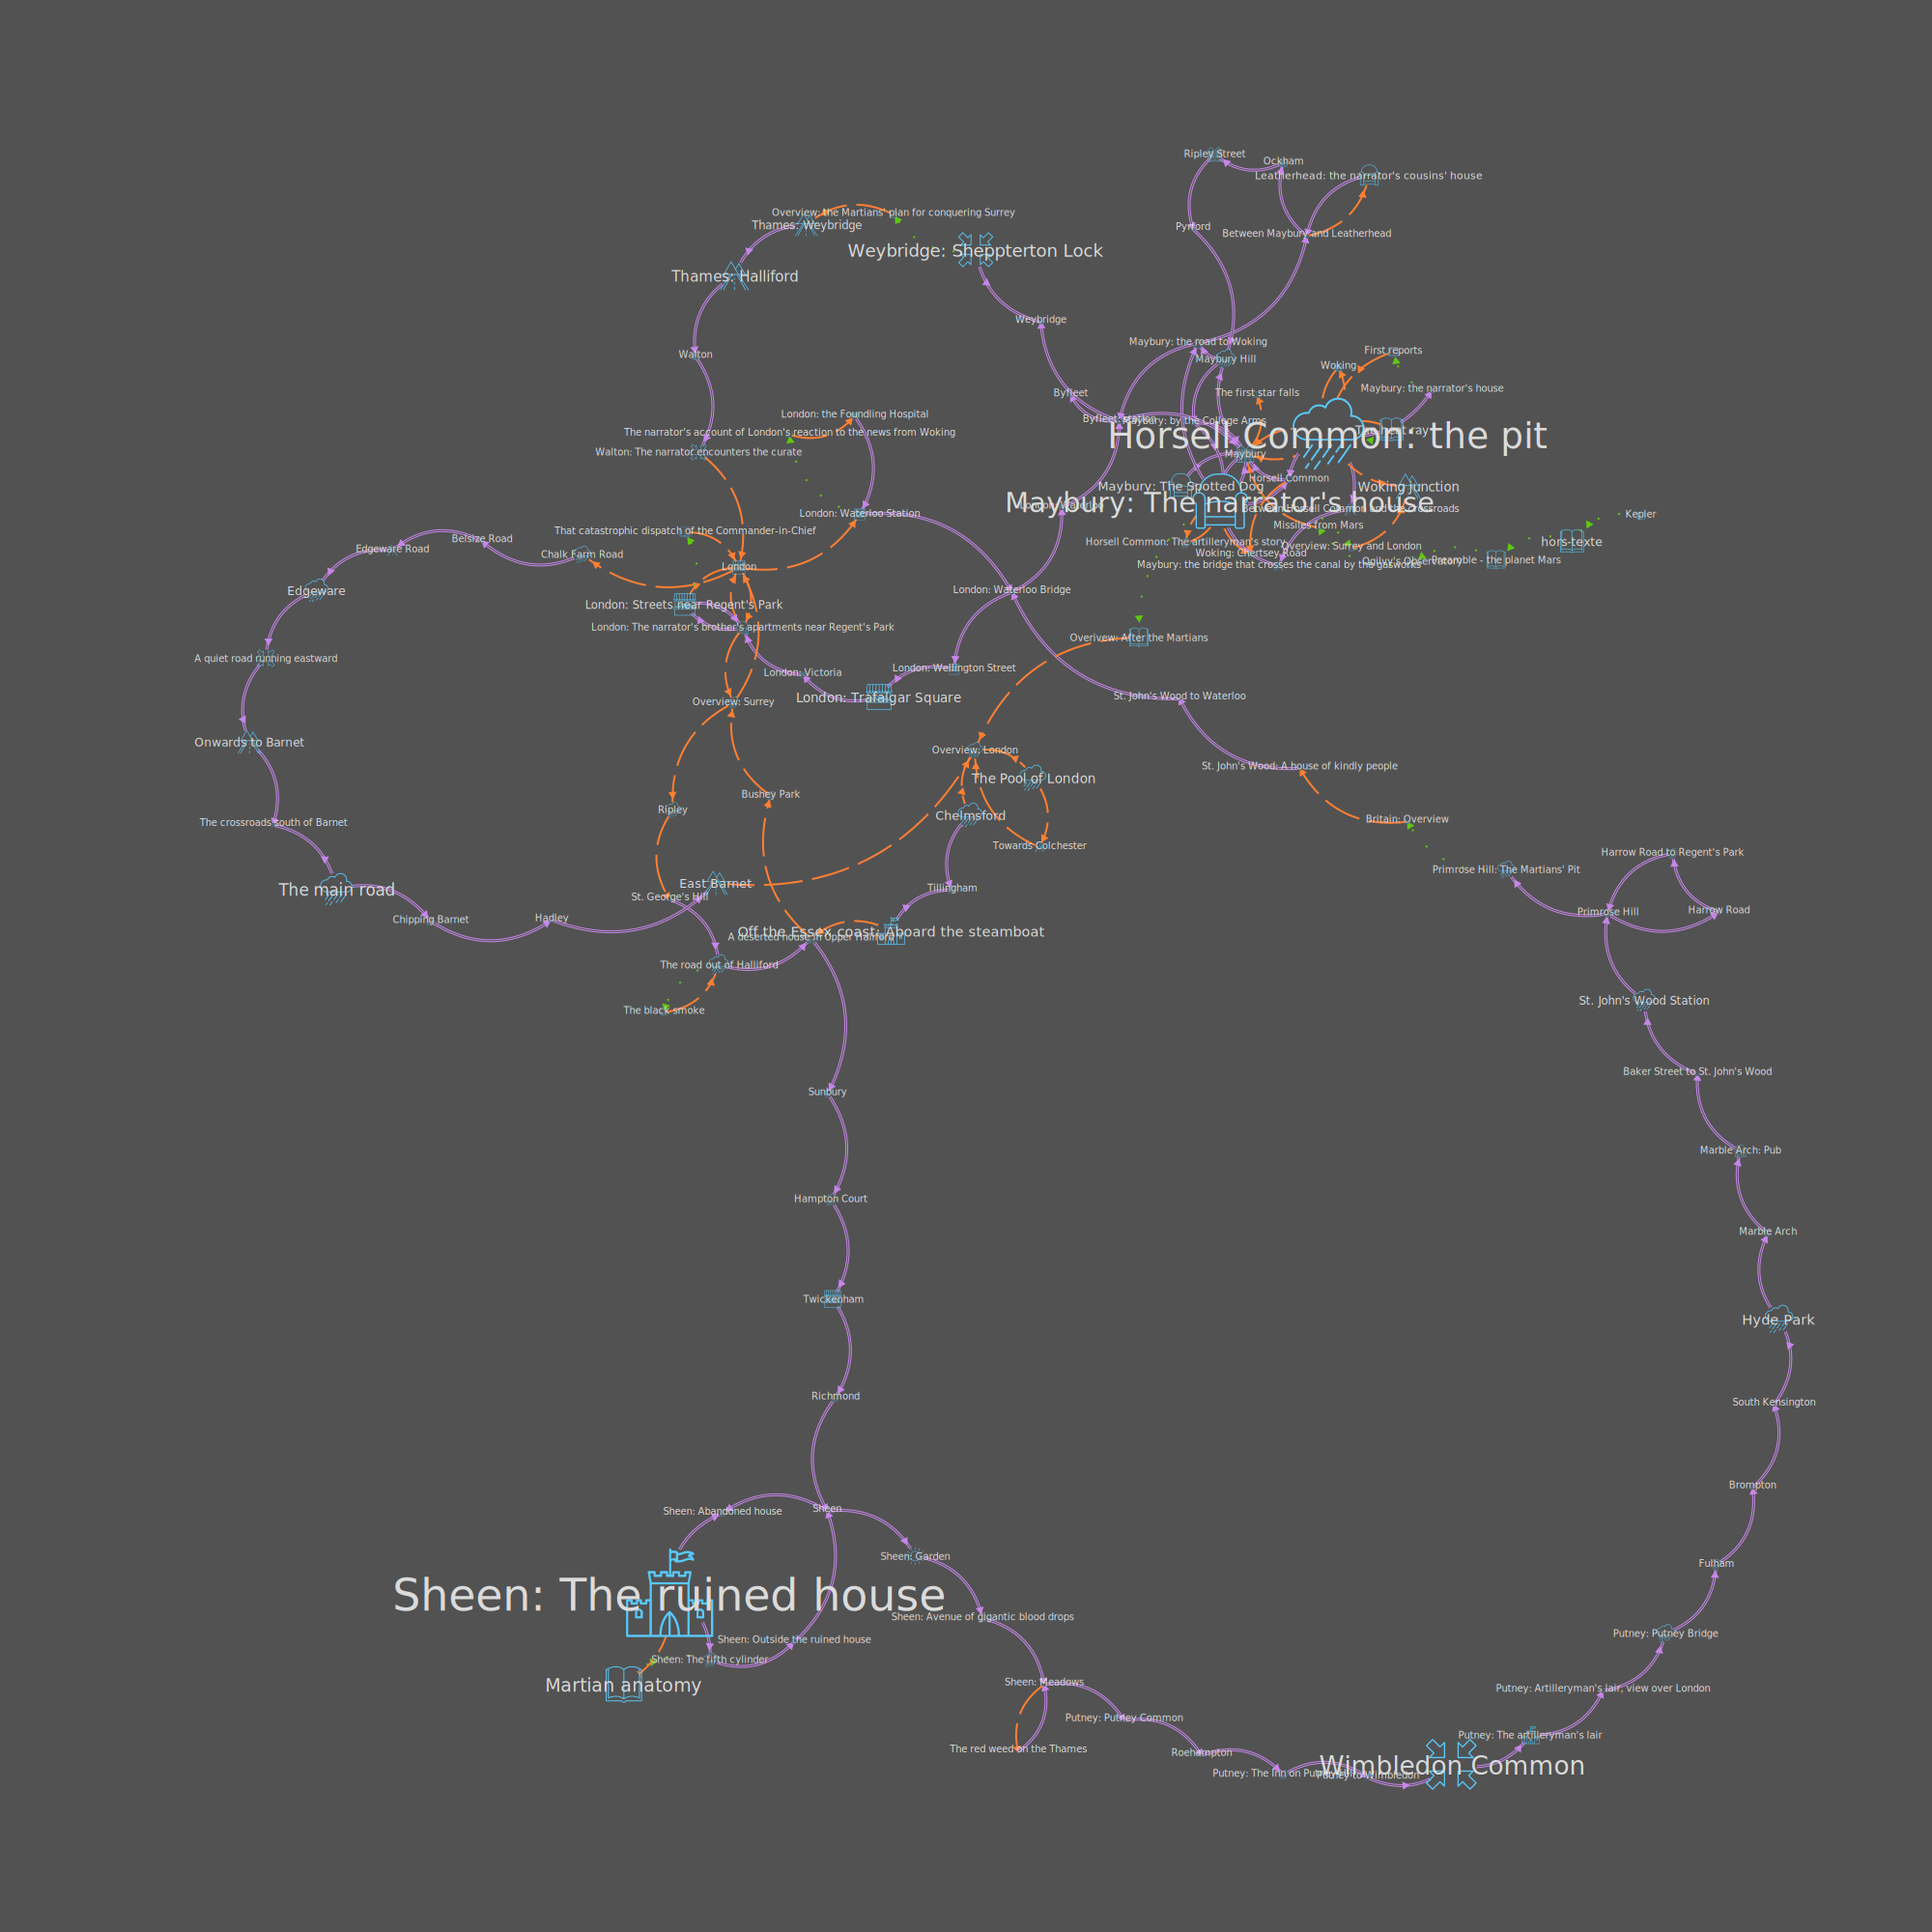

In [36]:
display_svg(SVG('files/svg/test.svg'))